"Does money make people happier?" 
Let's see. We downloaded Better Life Index data from the OECD's website and stats about gross domestic product(GDP) from the IMF's website. We combined these two and searched for a trend.

**Step 0:** Importing necessary modules.

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.neighbors

**Step 1**: Loading data.

In [69]:
oecd_bli = pd.read_csv("oecd_bli_2015.csv",thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t', encoding='latin1', na_values="n/a")

**Step 2:** Preparing the data.
Here, we join two data tables and make another table called country_stats which has three columns: country, GDP_per_capita from gdp_per_capita table and Life Satisfaction from oecd_bli. Let's prepare data and see how the new table looks.

In [70]:
#this part is copied from https://github.com/ageron/handson-ml2 , I don't understand this yet 
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print(country_stats.head(10))

                 GDP per capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1
Estonia               17288.083                5.6
Greece                18064.288                4.8
Portugal              19121.592                5.1
Slovenia              20732.482                5.7
Spain                 25864.721                6.5


**Step 2:** Analyzing data

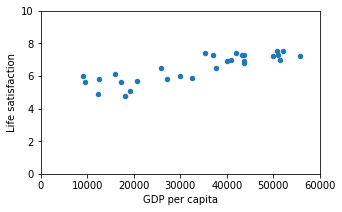

In [71]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
plt.show()

**Step 3:** Implementing a model

As, we can see, life satisfaction goes up more or less linearly with the increment of GDP per capita. So, we can decide that life satisfaction is a linear function of GDP per capita.

life_satisfaction = θ0 + θ1 × GDP_per_capita

We jhave to now select a model. In this case, we will be implementing linear regression model which selects the optimal  θ0,θ1 for given data.

In [72]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()
#model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3) #come back later

# Train the model
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can also check the values the model returned for θ0,θ1 and show it on the graph.


In [73]:
#the values of theta0 and theta1 
t0, t1 = model.intercept_[0], model.coef_[0][0]
print(t0, t1)

4.853052800266436 4.911544589158483e-05


As, we can see, we got the values of θ0 and θ1, 4.85 and 4.91 x 10^-5 respectively.

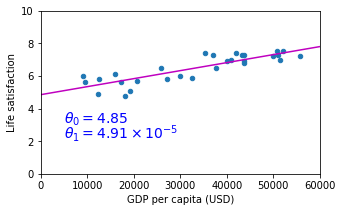

In [74]:
#showing the line
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)

plt.plot(X, t0 + t1*X, "m")

plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.show()

For Linear Regression problems, people typically use a cost function that measures the distance between the linear model’s
predictions and the training examples; the objective is to minimize this distance.
This is where the Linear Regression algorithm comes in: we have to feed it our training examples, and it finds the parameters that make the linear model fit best to our data. This is called training the model. In our case, the algorithm finds that the optimal parameter values are θ0 = 4.85 and θ1 = 4.91 × 10^–5. [from book: Hands on Machine Learning with Scikit-Learn, Keras and Tensorflow by Aurélien Géron]

**Step 4:** Predicting for new data.

Now, we will check what it predicts for unseen data. We see,Cyprus’s GDP per capita is $22,587, and so by applying our model, life satisfaction should likely be somewhere around 4.85 + 22,587 × 4.91 × 10-5 = 5.96.

In [75]:
X_new = [[22587]] # Cyprus's GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]] #outputs 5.77 for kNN

[[5.96242338]]


Okay.
Now, this was model based training, if we wanted to use instance-based training, we would have used K-nearest neighbor. Let's see, what it predicts for Cyprus.
We just have to go back to the code where we implemented linear regression model In[72] and instead of linear regression model , we have to select k nearest neighbors. Then, at last, the model will output 5.77 for Cyprus. What it does for kNN is, it selcects k (here k=3) nearest neighbors (nearest 3 GDPs to Cyprus') and calculates their average of life satisfaction and assigns this for Cyprus. In this case,we can see, the answers for kNN (instance based training) and for linear regression model (model based training) are pretty close.

This is all for now. Hopefully, we can select and implement a model for any given data and make good predictions from them.